In [1]:
import sys
sys.path.append("..")  # Go up one directory from notebooks to Customer_Segmentation_DevOps
data_filepath = "../data/customer_segmentation.csv"

In [2]:
from src.data_preparation.cleaning import *
from src.data_preparation.rfm import *

######################################################
from src.clustering.kmeans.analysis import * 
from src.clustering.kmeans.core import *

######################################################
from src.clustering.agglomerative.analysis import *
from src.clustering.agglomerative.core import *
######################################################
from src.clustering.pca_methods.core import *
from src.clustering.pca_methods.insights import *
######################################################
from src.clustering.spectral.analysis import *
from src.clustering.spectral.core import *
######################################################
from src.descriptive_stats.insights import *
from src.descriptive_stats.stats import *
######################################################
from src.dimensionality_reduction.comparison import *
from src.dimensionality_reduction.pca import *
######################################################
from src.visualization.clustering_visualization import *
from src.visualization.data_visualization import *
###################################################### will be tested after 
from src.data_preparation.encoding import *
from src.clustering.ann_methods.core import *
from src.clustering.ann_methods.insights import *





wuuuu


Testing:

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of

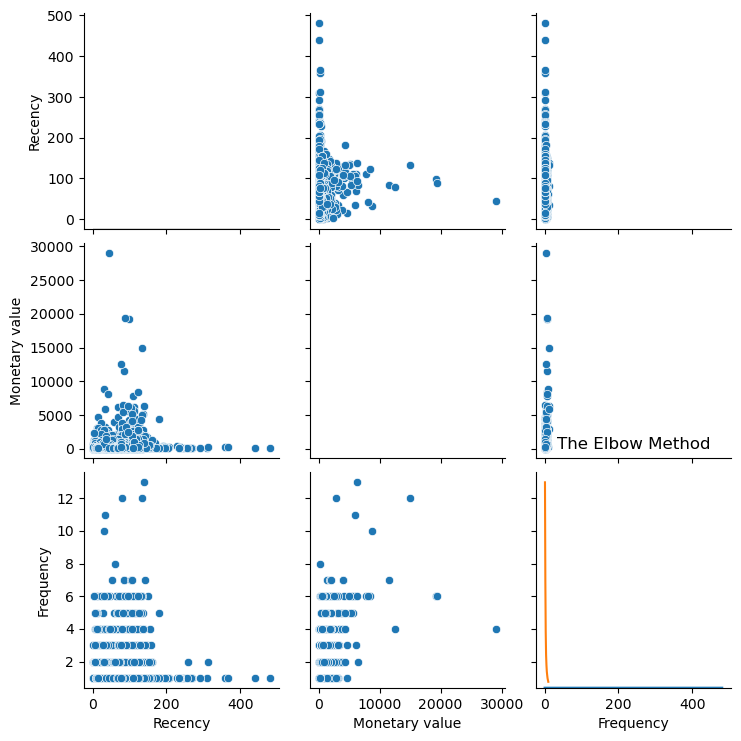

The top parameters to tune into Kmeans are: {'algorithm': 'lloyd', 'n_clusters': 5, 'n_init': 11}


The silhouette score for kmeans_cluster is: 0.8213341414753009


In [3]:
df = prepare_data(r"C:\Users\39339\Documents\University materials\University materials\Erasmus IE\DevOps\Devops_Project\Customer_Segmentation_DevOps\data\external\customer_segmentation.csv")
#df = drop_columns(df)
df = drop_c_id(df)
df = clean_data(df)

#RFM
frequency = get_frequencies(df)
monetary = get_monetary(df)
recency = get_recency(df)
rfm_dataset = concatenate_dataframes(recency, monetary, frequency)

#kmeans
visualize_data(rfm_dataset)
X = elbow_method(rfm_dataset)[0]
best_params = get_best_kmeans_params(X)
rfmcopy = choose(rfm_dataset,X)[0]
plot_clusters(rfmcopy, clusters1=choose(rfm_dataset,X)[1])

silscores = {}
silscores['kmeans'] = silhouette_score_f(X, rfmcopy, 'kmeans_cluster')






Agglomerative and Spectral tests

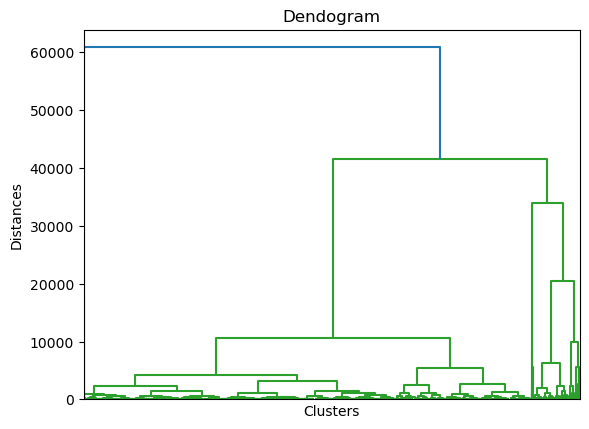

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [4]:
Dend = dendogram(X)
y_hc = agglomerative_clustering(X, rfmcopy)
plot_clusters(rfmcopy, clusters1=4)
silscores['hierarchical clustering'] = silhouette_score(X, y_hc, metric='euclidean')
rfmcopy['hc_clusters'] = y_hc

### spectral tests
spectral = spectral_clustering(X)
sp = spectral_clustering(X)[0]
sil_score = spectral_clustering(X)[1]
rfmcopy['sp_clusters'] = sp
visualize_spectral_clusters(X, sp)

silscores['Spectral clustering'] = sil_score




Clusters summary

In [6]:
rfmcopy

,Customer ID,Recency,Monetary value,Frequency,kmeans_cluster,hc_clusters,sp_clusters
0,001051abfcfdbed9f87b4266213a5df1,91,65.20,3,0,2,1
1,0013cd8e350a7cc76873441e431dd5ee,113,92.60,1,0,2,0
2,0015bc9fd2d5395446143e8b215d7c75,78,132.19,1,0,2,0
3,0018c09f333634ca9c80d9ff46e43e9c,58,56.87,1,0,2,1
4,001df1ee5c36767aa607001ab1a13a06,23,42.86,1,0,2,1
...,...,...,...,...,...,...,...
11122,ffee99041e111172de2006fe9e90202a,68,100.05,1,0,2,1
11123,fff212062d600f2e1d53f3c5d4a25138,15,65.44,1,0,2,1
11124,fff5169e583fd07fac9fec88962f189d,109,152.77,1,0,2,0
11125,fff93c1da78dafaaa304ff032abc6205,77,727.44,3,2,0,2


In [5]:
summ = cluster_summary(rfmcopy, 'Monetary value')
summ2 = cluster_summary(rfmcopy, 'Recency')
summ3 = cluster_summary(rfmcopy, 'Frequency')
print(summ)
print(summ2)
print(summ3)

(                Clustersize  Total spending by cluster  \
kmeans_cluster                                           
0                     10425                 1547291.06   
1                        34                  193548.37   
2                       664                  776789.36   
3                         4                   82694.58   

                Average spending by cluster  Average frequency by cluster  \
kmeans_cluster                                                              
0                                148.421205                      1.134676   
1                               5692.599118                      5.205882   
2                               1169.863494                      2.078313   
3                              20673.645000                      7.000000   

                Frequency std  Spending sd  
kmeans_cluster                              
0                    0.411942   122.320134  
1                    2.567624  2143.065864  
2      

PCA and Autoencoders

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

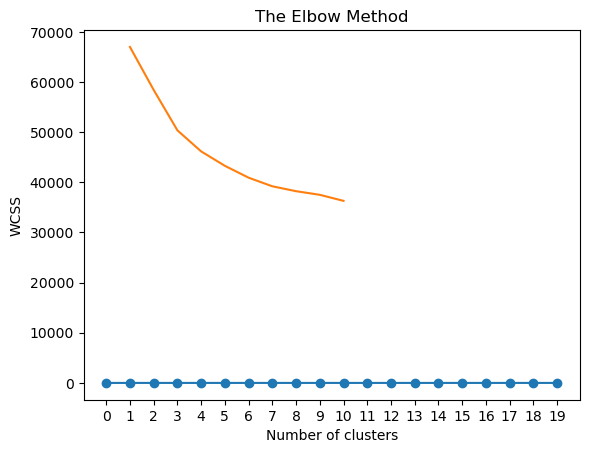

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



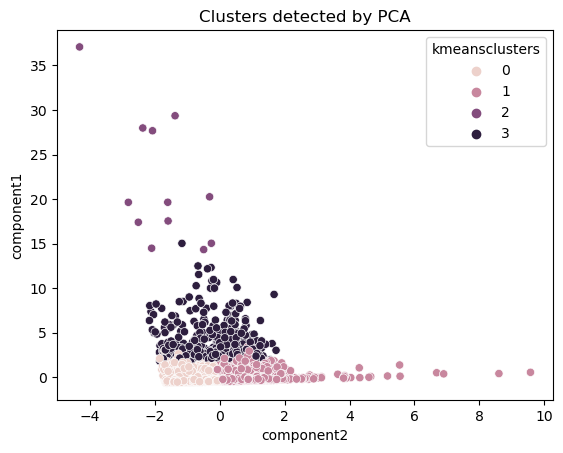

In [6]:
encode_df = encoding_PCA(df, rfm_dataset)[0]
newdf = encoding_PCA(df, rfm_dataset)[1]

sc_features = pca_preprocessing(newdf)
X_ = pca_ncomponents(sc_features)
scores = pca(X_)

segkmeans = pca_kmeans(sc_features, scores)[0]
kmeanspca = pca_kmeans(sc_features, scores)[1]

dfpca = pca_components(segkmeans, kmeanspca, rfmcopy)





ANN with Autoencoders

In [8]:
autoencoder, encoder, input_df = ann_autoencoder(X_)

#pr = ann_fit_predict(X_, autoencoder, encoder)[0]
#y2_pr = ann_fit_predict(X_, autoencoder, encoder)[1]
#kmeansann = ann_fit_predict(X_, autoencoder, encoder)[2]
pr, y2_pr, kmeansann = ann_fit_predict(X_, autoencoder, encoder)

pr, y2_pr, kmeansann = ann_fit_predict(X_, autoencoder, encoder)
dfann = conc_pca_ann(rfm_dataset, kmeansann, rfmcopy)

ann_clusters(dfann)


Epoch 1/50
87/87 [==============================] - 4s 37ms/step - loss: 0.0031
Epoch 2/50
87/87 [==============================] - 3s 38ms/step - loss: 0.0021
Epoch 3/50
87/87 [==============================] - 3s 38ms/step - loss: 0.0020
Epoch 4/50
87/87 [==============================] - 3s 39ms/step - loss: 0.0019
Epoch 5/50
87/87 [==============================] - 3s 38ms/step - loss: 0.0019
Epoch 6/50
87/87 [==============================] - 3s 39ms/step - loss: 0.0018
Epoch 7/50
87/87 [==============================] - 4s 47ms/step - loss: 0.0016
Epoch 8/50
87/87 [==============================] - 4s 44ms/step - loss: 0.0016
Epoch 9/50
87/87 [==============================] - 4s 44ms/step - loss: 0.0015
Epoch 10/50
87/87 [==============================] - 4s 44ms/step - loss: 0.0015
Epoch 11/50
87/87 [==============================] - 4s 46ms/step - loss: 0.0015
Epoch 12/50
87/87 [==============================] - 4s 45ms/step - loss: 0.0015
Epoch 13/50
87/87 [==================

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Epoch 1/50
87/87 [==============================] - 4s 51ms/step - loss: 0.0014
Epoch 2/50
87/87 [==============================] - 4s 49ms/step - loss: 0.0014
Epoch 3/50
87/87 [==============================] - 4s 46ms/step - loss: 0.0012
Epoch 4/50
87/87 [==============================] - 4s 44ms/step - loss: 0.0012
Epoch 5/50
87/87 [==============================] - 4s 44ms/step - loss: 0.0015
Epoch 6/50
87/87 [==============================] - 4s 42ms/step - loss: 0.0014
Epoch 7/50
87/87 [==============================] - 4s 41ms/step - loss: 0.0012
Epoch 8/50
87/87 [==============================] - 4s 41ms/step - loss: 0.0012
Epoch 9/50
87/87 [==============================] - 4s 42ms/step - loss: 0.0012
Epoch 10/50
87/87 [==============================] - 4s 41ms/step - loss: 0.0012
Epoch 11/50
87/87 [==============================] - 4s 41ms/step - loss: 0.0011
Epoch 12/50
87/87 [==============================] - 4s 43ms/step - loss: 0.0012
Epoch 13/50
87/87 [==================

c:\Users\39339\anaconda3\envs\devops_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



TypeError: silhouette_score_f() got an unexpected keyword argument 'metric'

In [9]:
silscores['ann'] = silhouette_score(X, kmeansann.labels_, metric='euclidean')


In [12]:
pd.DataFrame(silscores).head()

,kmeans,hierarchical clustering,Spectral clustering,ann
kmeans_cluster,0.821334,0.79044,0.341735,-0.101502


c:\Users\39339\Documents\University materials\University materials\Erasmus IE\DevOps\Devops_Project\Customer_Segmentation_DevOps\notebooks\..\src\visualization\data_visualization.py:20: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




AttributeError: module 'matplotlib' has no attribute 'plot'

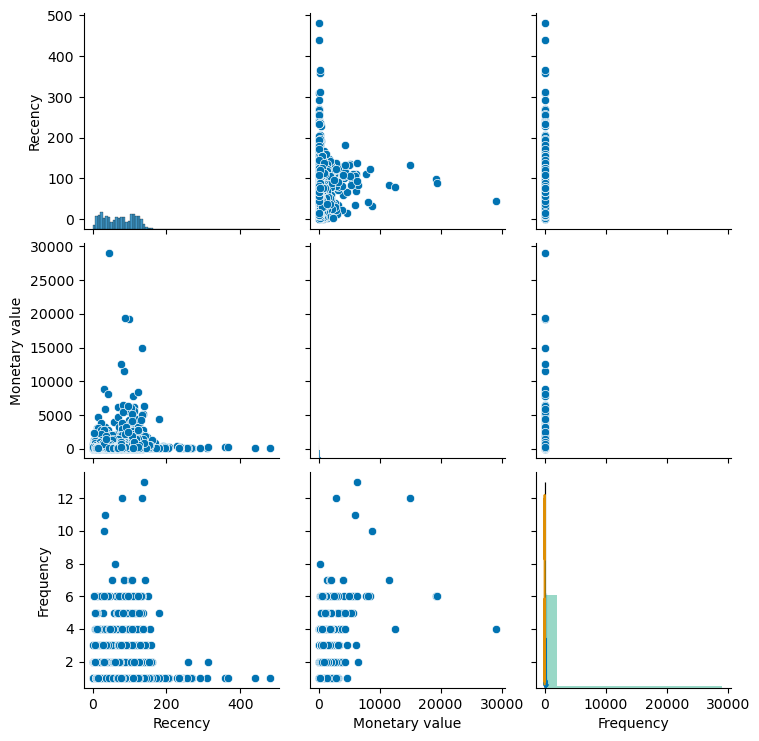

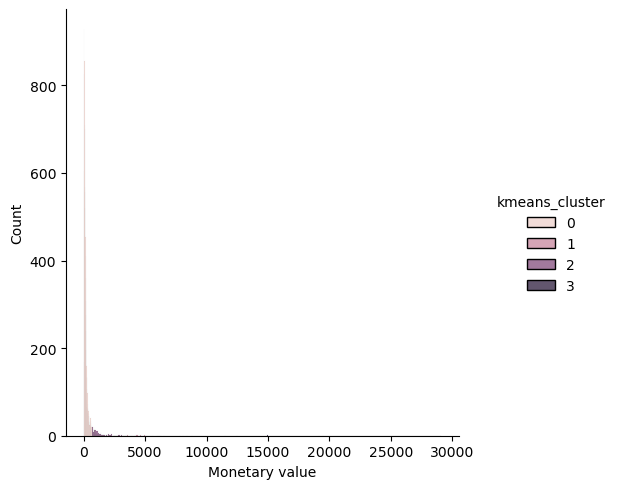

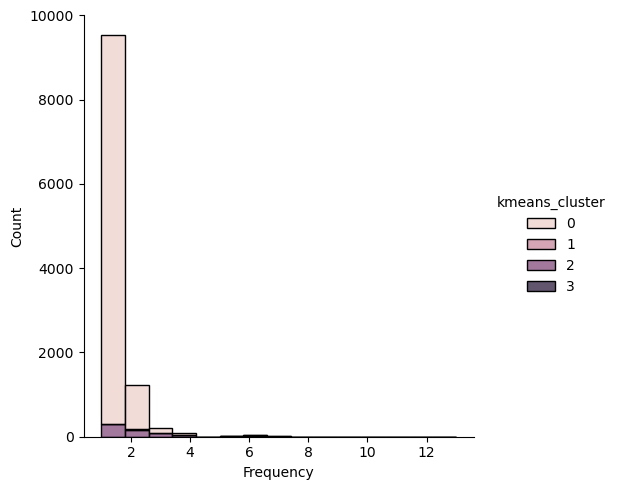

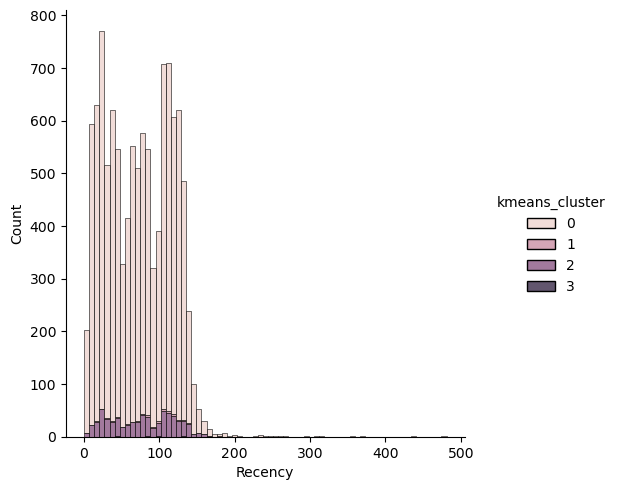

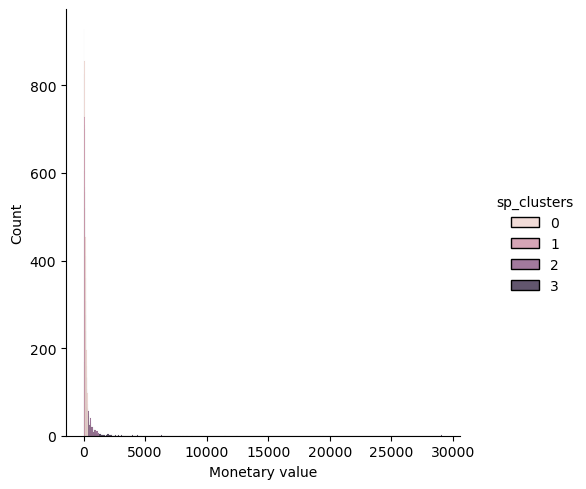

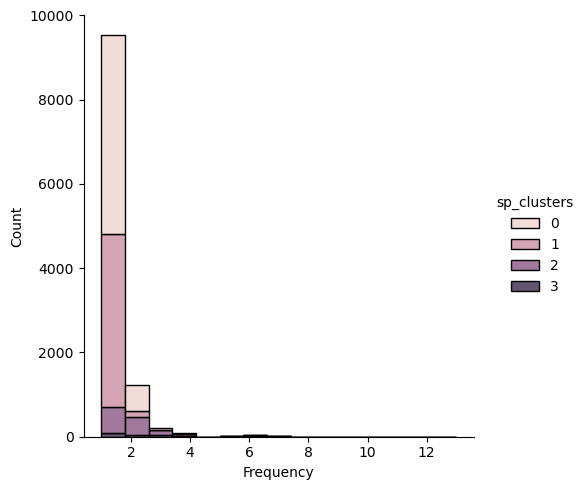

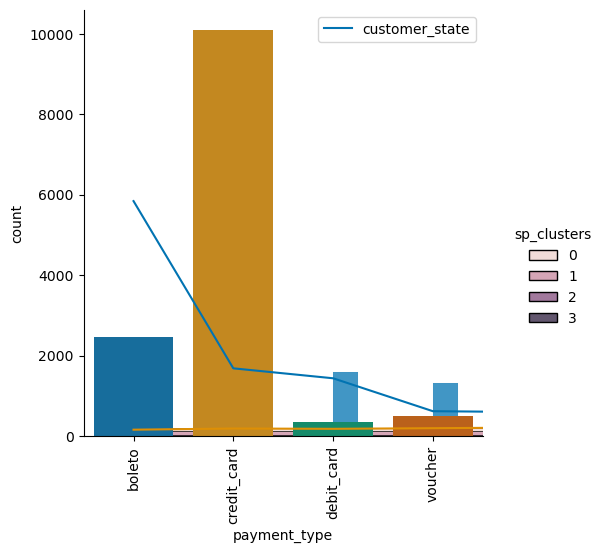

In [18]:
#visualization...
visualize_data(rfm_dataset)
plot_average_spending_by_frequency(rfm_dataset)
plot_payment_value_distribution(rfm_dataset)
segments_insights(rfmcopy)
installments_analysis(df, rfmcopy)
#customers_insights(paydf) to be checked
customer_geography(df)
payments_insights(df)
prod_insights(df)

In [16]:
rfmcopy

,Customer ID,Recency,Monetary value,Frequency,kmeans_cluster,hc_clusters,sp_clusters,clustersann
0,001051abfcfdbed9f87b4266213a5df1,91,65.20,3,0,2,1,3
1,0013cd8e350a7cc76873441e431dd5ee,113,92.60,1,0,2,0,1
2,0015bc9fd2d5395446143e8b215d7c75,78,132.19,1,0,2,0,2
3,0018c09f333634ca9c80d9ff46e43e9c,58,56.87,1,0,2,1,1
4,001df1ee5c36767aa607001ab1a13a06,23,42.86,1,0,2,1,1
...,...,...,...,...,...,...,...,...
11122,ffee99041e111172de2006fe9e90202a,68,100.05,1,0,2,1,0
11123,fff212062d600f2e1d53f3c5d4a25138,15,65.44,1,0,2,1,0
11124,fff5169e583fd07fac9fec88962f189d,109,152.77,1,0,2,0,0
11125,fff93c1da78dafaaa304ff032abc6205,77,727.44,3,2,0,2,3
